In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
# Set environment variable to avoid memory leak issue
os.environ["OMP_NUM_THREADS"] = "5"

In [5]:
# Load dataset
file_path = r"C:\Users\vedan\Desktop\Club Task 2\WineQT.csv"
df = pd.read_csv(file_path, encoding='utf-8')


In [7]:
# Drop the 'Id' column if it exists
if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)


In [9]:
# Convert quality into binary classification
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)  # High (6-10) vs. Low (0-5)

In [11]:
# Feature Engineering: Creating total acidity
df['total_acidity'] = df['fixed acidity'] + df['volatile acidity']

In [13]:
# Normalize numerical features
scaler = StandardScaler()
features = df.drop(columns=['quality'])
df_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
df_scaled['quality'] = df['quality']

In [15]:
# Split data into train & test sets
X = df_scaled.drop(columns=['quality'])
y = df_scaled['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# ---- Feature Importance with Random Forest ----
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
important_features = X.columns[np.argsort(feature_importances)[::-1][:8]]  # Keep top 8 features
X_train = X_train[important_features]
X_test = X_test[important_features]

In [19]:
# ---- Decision Tree (Improved Hyperparameter Tuning) ----
dt_params = {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_
y_pred_dt = dt_best.predict(X_test)
print("Best Decision Tree Model:")
print(classification_report(y_test, y_pred_dt))

Best Decision Tree Model:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       102
           1       0.79      0.72      0.75       127

    accuracy                           0.74       229
   macro avg       0.74      0.74      0.74       229
weighted avg       0.74      0.74      0.74       229



In [21]:
# ---- Random Forest (Improved Tuning) ----
rf_params = {'n_estimators': [100, 300, 500], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)
print("Best Random Forest Model:")
print(classification_report(y_test, y_pred_rf))

Best Random Forest Model:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       102
           1       0.81      0.77      0.79       127

    accuracy                           0.77       229
   macro avg       0.77      0.77      0.77       229
weighted avg       0.77      0.77      0.77       229



In [22]:
# ---- XGBoost Classifier ----
xgb = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Model:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Model:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75       102
           1       0.81      0.76      0.79       127

    accuracy                           0.77       229
   macro avg       0.77      0.77      0.77       229
weighted avg       0.77      0.77      0.77       229



In [25]:
# ---- Neural Network (MLP) ----
mlp = MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("MLP Neural Network Model:")
print(classification_report(y_test, y_pred_mlp))


MLP Neural Network Model:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       102
           1       0.77      0.77      0.77       127

    accuracy                           0.75       229
   macro avg       0.74      0.74      0.74       229
weighted avg       0.75      0.75      0.75       229



In [29]:
# Set environment variable to avoid memory leak issue
os.environ["OMP_NUM_THREADS"] = "5"

# ---- K-Means Clustering ----
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X)


C:\Users\vedan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


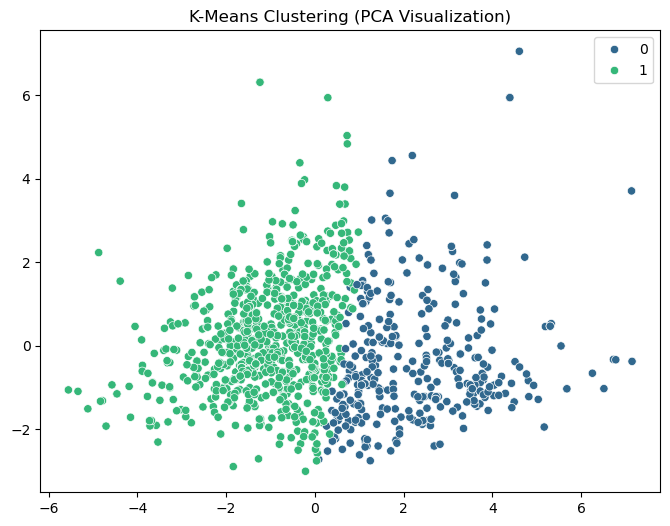

In [31]:
# ---- Visualizing Clusters using PCA ----
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering (PCA Visualization)')
plt.show()